# Web scrapping project - house price in Zagreb

In this project we are going to use selenium webdriver and beautifulSoup for scrapping information of apartments in Zagreb,Croatia. After we are going to analyze all apartments and predict their price based on location,living area and number of rooms

In [221]:
#importing libraries
import csv
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

In [222]:
#setting Chrome driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/home/mattdmv/.wdm/drivers/chromedriver/linux64/89.0.4389.23/chromedriver] found in cache


In [223]:
# gettin url of page we want to scrap
url ="https://www.crozilla-nekretnine.com/oglasi/zagreb/stanovi/prodaja?page=1"
driver.get(url)

In [188]:
# setting soup
soup= BeautifulSoup(driver.page_source,"html.parser")

In [189]:
#finding all apartmets on single page
apartments=soup.find_all("div","ct-main-content")

In [190]:
len(apartments)

20

In [191]:
# identifying second apartment
sec_apartment=apartments[1]

In [192]:
#Location
sec_apartment.find("div","ct-headline overflow").text.strip().replace(" ","").split("\n")[1]

'Trešnjevka'

In [219]:
#price of apartment
sec_apartment.find("span","upper price-big").text.strip().replace("\n","").replace(" ","").replace("€","")

'76.000'

In [194]:
#Living area
sec_apartment.find_all("li")[2].text.strip().replace("\n","")[:5]

'22'

In [195]:
#Price per sqft
sec_apartment.find_all("li")[1].text.strip()[:5]

'2.375'

In [196]:
#Rooms
sec_apartment.find_all("li")[3].text.strip().replace("\nbroj soba","")

'1'

In [224]:
Location=[]
Post_number=[]
Price=[]
Sqft=[]
Living_area=[]
Rooms=[]
pages=range(1,162)

for page in pages:
    url ="https://www.crozilla-nekretnine.com/oglasi/zagreb/stanovi/prodaja?page={}".format(page)
    driver.get(url)
    soup= BeautifulSoup(driver.page_source,"html.parser")
    apartments=soup.find_all("div","ct-main-content")
    for i in apartments:
        Location.append(i.find("div","ct-headline overflow").text.strip().replace(" ","").split("\n")[1])
        Post_number.append(i.find("div","ct-headline overflow").text.strip()[:5])                
        Price.append(i.find("span","upper price-big").text.strip().replace("\n","").replace(" ","").replace("€",""))
        Sqft.append(i.find_all("li")[1].text.strip()[:5])
        Living_area.append(i.find_all("li")[2].text.strip().replace("\n","")[:5])
        try:
            Rooms.append(i.find_all("li")[3].text.strip().replace("\nbroj soba",""))
        except:
            Rooms.append(0)

In [225]:
data=list(zip(Location,Post_number,Price,Sqft,Living_area,Rooms))

In [1]:
import pandas as pd

In [227]:
#making dataframe
df=pd.DataFrame(data,columns=["Location","Post_number","Price","Price_per_sqft","Living_area","Rooms"])

In [228]:
df.shape

(3220, 6)

In [229]:
df.sample(20)

,Location,Post_number,Price,Price_per_sqft,Living_area,Rooms
451,Centar,10000,150.000,2.174,"69,00",2
1126,Centar,10000,107.000,2.675,"40,00",1
1509,Trešnjevka,10110,171.390,2.597,"66,00",2
2092,Trešnjevka,10110,178.000,2.145,"83,00",3
688,DonjiGrad,10000,175.000,3.241,"54,00",3
2620,Šestine,10000,681.723,2.100,"324,6",6
374,Kajzerica,10020,126.500,2.530,"50,00",3
1519,Mikulići,10000,212.930,1.990,"107,0",4
2627,DonjiGrad,10000,400.000,3.077,"130,0",4
558,Šestine,10000,273.000,2.022,"135,0",4


In [230]:
#saving to csv file
df.to_csv("Zagreb_housing_price")

In [2]:
df2=pd.read_csv("Zagreb_housing_price")
df2.sample(20)

,Unnamed: 0,Location,Post_number,Price,Price_per_sqft,Living_area,Rooms
727,727,Kvatrić,10000,492.000,3.000,"164,0",4
89,89,Botinec,10020,61.000,1.326,"46,00",2
547,547,Centar,10000,320.000,2.388,"134,0",5
1901,1901,Centar,10000,596.750,5.525,"108,0",4
628,628,Kruge,10020,167.500,2.094,"80,00",3
1606,1606,Centar,10000,696.000,5.007,"139,0",5
2433,2433,Jarun,10000,66.000,2.000,"33,00",2
2763,2763,DonjiGrad,10000,185.000,2.643,"70,00",3
1835,1835,Trnje,10020,145.000,2.636,"55,00",1
999,999,Medveščak,10000,115.000,2.323,"49,50",1


## Exploring data

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3220 non-null   int64 
 1   Location        3220 non-null   object
 2   Post_number     3220 non-null   int64 
 3   Price           3220 non-null   object
 4   Price_per_sqft  3220 non-null   object
 5   Living_area     3220 non-null   object
 6   Rooms           3220 non-null   object
dtypes: int64(2), object(5)
memory usage: 176.2+ KB


In [4]:
df2.nunique()

Unnamed: 0        3220
Location            82
Post_number         12
Price             1084
Price_per_sqft    1490
Living_area        814
Rooms               15
dtype: int64

In [5]:
#locations
df2["Location"].unique()

array(['Sesvete', 'Kustošija', 'Maksimir', 'Vrbik', 'Bukovac',
       'DonjiGrad', 'Pantovčak', 'Špansko', 'Dubrava', 'Gračani',
       'Brestje', 'Kajzerica', 'Črnomerec', 'Trnje', 'Šestine',
       'Trešnjevka', 'Travno', 'Klara', 'Zagreb', 'Voltino', 'Sigečica',
       'Kvatrić', 'Markuševec', 'Centar', 'Remete', 'Ravnice', 'Vrapče',
       'Jarun', 'Gajnice', 'Trnsko', 'Botinec', 'Borongaj', 'Vrbani',
       'Siget', 'Šalata', 'Malešnica', 'Srednjaci', 'Trokut', 'Volovčica',
       'Knežija', 'Mikulići', 'Rudeš', 'Sloboština', 'Dugave', 'Svetice',
       'Savica', 'Žitnjak', 'Medveščak', 'Cvjetnonaselje', 'Utrina',
       'Borovje', 'GornjiGrad', 'Stenjevec', 'Prečko', 'Tuškanac',
       'Folnegovićevonaselje', 'Mlinovi', 'Središće', 'Savskigaj',
       'Lanište', 'Poljanice', 'Ksaver', 'Podsused', 'Dubec', 'Kruge',
       'Jankomir', 'Zapruđe', 'Remetinec', 'Sopot', 'Klaka', 'Susedgrad',
       'Ferenščica', 'Pešćenica', 'Laščina', 'Lukšići', 'Vukomerec',
       'Ljubljanica', 'Bu

In [76]:
df2["Location"]=df2["Location"].replace({
    "DonjiGrad":"Donji Grad",
    "Folnegovićevonaselje":" Folnegovićevo naselje",
    "Cvjetnonaselje":"Cvjetno naselje",
    "GornjiGrad":"Gornji Grad"
})

We have string in price column so we will drop that column and convert column with price into float.

In [77]:
df3=df2[(df2["Price"]!="naupit")&(df2["Rooms"]!="0")]
df3.shape

(3169, 7)

We can se we droped more then 50 apartments.

In [78]:
df4=df3.copy()

In [79]:
df4["Price"]=df3["Price"].str.split(".").apply("".join)

In [80]:
#extracting only numeric values 
df4["Living_area"]=df3["Living_area"].str.extract("(\d*\.?\d+)", expand=True)

In [81]:
df4["Rooms"]=df4["Rooms"].str.extract("(\d*\.?\d+)", expand=True)

In [82]:
#converting into float
df4["Price_per_sqft"]=df4["Price_per_sqft"].str.split(".").apply("".join)

In [83]:
df4.head()

,Unnamed: 0,Location,Post_number,Price,Price_per_sqft,Living_area,Rooms
0,0,Sesvete,10360,120000,1071,112,5
1,1,Kustošija,10000,210000,1329,158,4
2,2,Maksimir,10000,460000,2556,180,4
3,3,Maksimir,10000,495000,2552,194,4
4,4,Vrbik,10000,149500,2136,70,3


In [84]:
#converting into int
df4["Price"]=df4["Price"].astype(int)

In [85]:
df4["Living_area"]=df4["Living_area"].astype(int)

In [86]:
df4["Price_per_sqft"]=df4["Price_per_sqft"].astype(int)

In [87]:
#converting into float
df4["Rooms"]=df4["Rooms"].astype(float)

In [88]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3219
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3169 non-null   int64  
 1   Location        3169 non-null   object 
 2   Post_number     3169 non-null   int64  
 3   Price           3169 non-null   int64  
 4   Price_per_sqft  3169 non-null   int64  
 5   Living_area     3169 non-null   int64  
 6   Rooms           3169 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 198.1+ KB


In [89]:
#Droping column
df4=df4.drop(["Unnamed: 0"],axis=1)

In [90]:
df4.shape

(3169, 6)

## Analyzing aprtments in Zagreb

In [91]:
import seaborn as sns
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Top five most expensive location in Zagreb by average sqft price

In [92]:
#avaerage sqft price by location
df4.groupby("Location")["Price_per_sqft"].mean().sort_values(ascending=False)[:5]

Location
Središće       3147.000000
Tuškanac       3025.235294
Centar         3010.266949
Gornji Grad    2943.761905
Medveščak      2808.037736
Name: Price_per_sqft, dtype: float64

<AxesSubplot:xlabel='Location'>

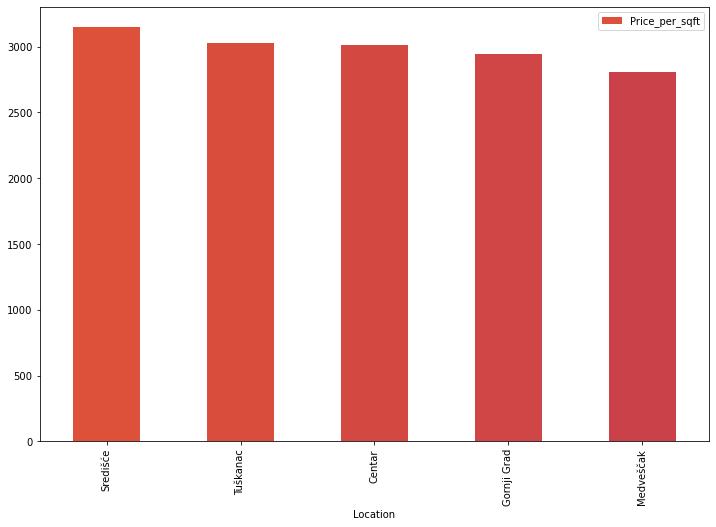

In [93]:
# Average sqft price  by location in Zagreb
location=df4.groupby("Location")["Price_per_sqft"].mean().reset_index("Location")
color = cm.inferno_r(np.linspace(.4, .8, 30))
location=location.sort_values("Price_per_sqft" , ascending=[False])[:5]
location.plot.bar(x="Location", y='Price_per_sqft', color=color , figsize=(12,8))

From above we can see that Središće and Tuškanac   are the most expensive locations by price per sqft.

### Top five  cheapest location in Zagreb by average sqft price

In [94]:
#avaerage sqft price by location
df4.groupby("Location")["Price_per_sqft"].mean().sort_values(ascending=True)[:5]

Location
Čučerje     795.000000
Žitnjak    1246.000000
Borovje    1323.250000
Brestje    1332.857143
Botinec    1366.500000
Name: Price_per_sqft, dtype: float64

<AxesSubplot:xlabel='Location'>

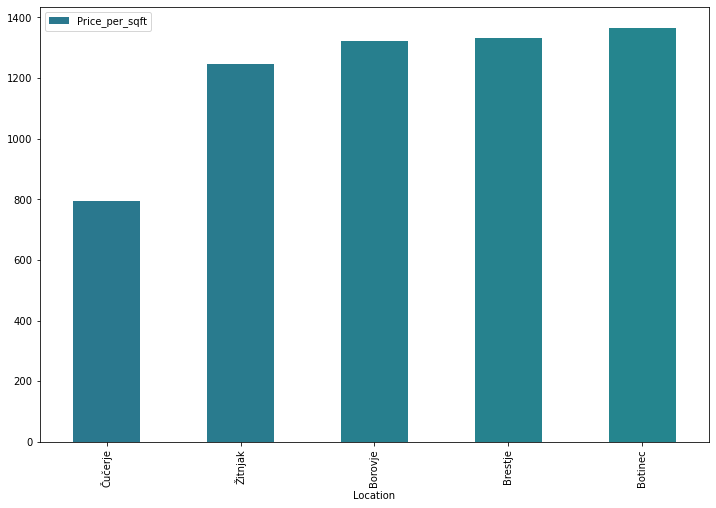

In [95]:
# Average sqft price  by location in Zagreb
location=df4.groupby("Location")["Price_per_sqft"].mean().reset_index("Location")
color = cm.viridis(np.linspace(.4, .8, 30))
location=location.sort_values("Price_per_sqft" , ascending=[True])[:5]
location.plot.bar(x="Location", y='Price_per_sqft', color=color , figsize=(12,8))

We can see that Čučerje is the cheapest location in Zagreb to buy apartment.

### Apartment with most living area by location

In [96]:
df4.groupby("Location")["Living_area"].max()[:10]

Location
 Folnegovićevo naselje     65
Borongaj                   53
Borovje                   120
Botinec                   139
Brestje                   175
Bukovac                   270
Buzin                      68
Centar                    441
Cvjetno naselje            77
Dedići                    185
Name: Living_area, dtype: int64

Text(0, 0.5, 'm2')

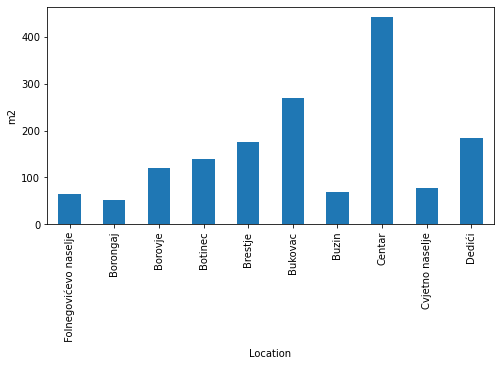

In [97]:
plt.figure(figsize=(8,4))
df4.groupby("Location")["Living_area"].max()[:10].plot.bar()
plt.ylabel("m2")

The biggest apartment is located in Centar and has 441 m2.

In [98]:
#counting location
df4["Location"].value_counts()

Donji Grad     615
Trešnjevka     251
Centar         236
Črnomerec      225
Maksimir       181
              ... 
Čučerje          1
Klaka            1
Ljubljanica      1
Buzin            1
Vukomerec        1
Name: Location, Length: 82, dtype: int64

We can see that we have a lot of rows with only 1 unique values of location. Because of that we will make function that will put all values that are less then 10 in "other" category.

In [99]:
#counting values in location
location_stat=df4["Location"].value_counts()

In [100]:
location_less_10=location_stat[location_stat<10]
len(location_less_10)

33

In [101]:
#
df4["Location"]=df4["Location"].apply(lambda x: "other" if x in location_less_10 else x)

In [102]:
len(df4["Location"].unique())

50

## Outliers

In [103]:
df4.shape

(3169, 6)

In [104]:
df4["Price_per_sqft"].describe()

count    3169.000000
mean     2322.985800
std       796.383199
min         2.000000
25%      1857.000000
50%      2183.000000
75%      2647.000000
max      7609.000000
Name: Price_per_sqft, dtype: float64

In [105]:
# droping aparmtent which has price per sqft less then mean - std and more then mean + std in certain location
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqft) #mean
        st = np.std(subdf.Price_per_sqft) #standard deviation
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_outliers(df4)
df5.shape

(2342, 6)

In [106]:
df5["Rooms"].describe()

count    2342.000000
mean        2.933817
std         1.197809
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: Rooms, dtype: float64

In [107]:
df5[df5["Rooms"]>=6][:15]

,Location,Post_number,Price,Price_per_sqft,Living_area,Rooms
24,Bukovac,10000,330000,2298,143,6.0
41,Bukovac,10000,330000,1941,170,6.0
181,Centar,10000,430000,2688,160,6.0
250,Donji Grad,10000,440000,2126,207,6.0
254,Donji Grad,10000,1123850,2470,455,8.0
256,Donji Grad,10000,685000,3100,221,6.0
259,Donji Grad,10000,415000,1886,220,7.0
274,Donji Grad,10000,771032,3100,248,8.0
318,Donji Grad,10000,714000,2006,356,20.0
339,Donji Grad,10000,335000,1903,176,7.0


For better model accuracy we are going to drop apartments that have 10 or more rooms and we will assume that typicial threshold for living area per room is 12 m2 so we will use this criteria to find outliers.

In [108]:
df6=df5[df5["Rooms"]<10]

In [109]:
df7=df6[df6["Living_area"]/df6["Rooms"]>12]

/home/mattdmv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


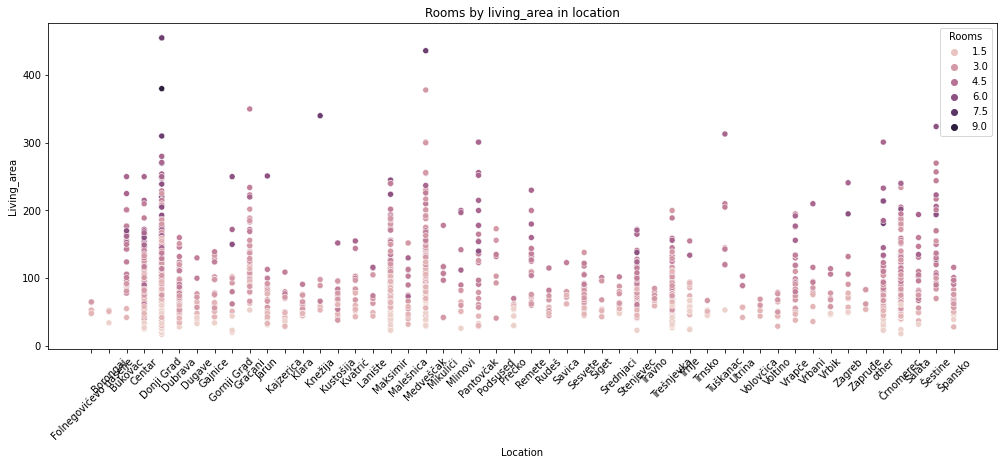

In [110]:
title = 'Rooms by living_area in location'
plt.figure(figsize=(17,6))
sns.scatterplot(df7.Location,df7.Living_area,hue=df7.Rooms).set_title(title)
plt.xticks(rotation=45)
plt.ioff()

We will now write a function that will remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [111]:
def remove_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'): #grouping by location
        room_stats = {}
        for b, b_df in location_df.groupby('Rooms'): # grouping by bedroom in location groupby
            room_stats[b] = {                       #dictionary with mean,standard deviation and count
                'mean': np.mean(b_df.Price_per_sqft),
                'std': np.std(b_df.Price_per_sqft),
                'count': b_df.shape[0]
            }
        for b, b_df in location_df.groupby('Rooms'):
            stats = room_stats.get(b-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, b_df[b_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_outliers(df7)
df8.shape

(1442, 6)

## Preparing data

In [112]:
df9=df8.drop(["Post_number","Price_per_sqft"],axis=1)
df9.sample(10)

,Location,Price,Living_area,Rooms
1335,Medveščak,210000,60,1.0
1489,Savica,120000,62,2.0
493,Donji Grad,350000,115,2.0
1110,Maksimir,62000,26,2.0
2165,Črnomerec,75000,39,1.0
1036,Knežija,204000,98,3.0
1076,Kvatrić,123001,58,2.0
1815,Trešnjevka,119000,53,2.0
1282,Medveščak,385000,123,4.0
1483,Rudeš,144375,68,3.0


Now we will transfrom categorical column which is location into numerical by using dummy function.

In [113]:
#function for creating dummy columns
dummies = pd.get_dummies(df9.Location)
dummies.head(5)

,Folnegovićevo naselje,Borongaj,Bukovac,Centar,Donji Grad,Dubrava,Dugave,Gajnice,Gornji Grad,Gračani,...,Vrapče,Vrbani,Vrbik,Zagreb,Zapruđe,other,Črnomerec,Šalata,Šestine,Špansko
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df10 = pd.concat([df9,dummies.drop("other",axis=1)],axis=1)
df10.head()

,Location,Price,Living_area,Rooms,Folnegovićevo naselje,Borongaj,Bukovac,Centar,Donji Grad,Dubrava,...,Voltino,Vrapče,Vrbani,Vrbik,Zagreb,Zapruđe,Črnomerec,Šalata,Šestine,Špansko
0,Folnegovićevo naselje,110000,52,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Folnegovićevo naselje,80000,48,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Folnegovićevo naselje,115000,64,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Folnegovićevo naselje,145000,65,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Folnegovićevo naselje,100000,53,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df11= df10.drop("Location",axis=1)
df11.head()

,Price,Living_area,Rooms,Folnegovićevo naselje,Borongaj,Bukovac,Centar,Donji Grad,Dubrava,Dugave,...,Voltino,Vrapče,Vrbani,Vrbik,Zagreb,Zapruđe,Črnomerec,Šalata,Šestine,Špansko
0,110000,52,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80000,48,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,115000,64,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,145000,65,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000,53,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df11.shape

(1442, 52)

# Building model

In [117]:
X=df11.drop(["Price"],axis=1)
y=df11["Price"]

In [118]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
lr=LinearRegression()

In [121]:
#fitting the model
lr.fit(train_X,train_y)

LinearRegression()

In [122]:
# Evaluate score of model
lr.score(test_X,test_y)

0.9615458689611744

In [123]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #randomize samples

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.95134387, 0.94940211, 0.93906137, 0.95797539, 0.9419962 ,
       0.93122862, 0.95468813, 0.94223932, 0.90953955, 0.9529492 ])

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [125]:
#function for searching best model
def best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [126]:
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.947956,{'normalize': True}
1,lasso,0.947992,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.923969,"{'criterion': 'mse', 'splitter': 'random'}"


Linear regression model and Lasso have the best accuracy. We are going to use Linear Regression model

In [127]:
def predict_price(Location,living_area,rooms):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = living_area
    x[1] = rooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [135]:
df9.sample(5)

,Location,Price,Living_area,Rooms
534,Donji Grad,235000,87,3.0
1358,Medveščak,270000,80,2.0
1885,Utrina,87000,42,2.0
1819,Trešnjevka,190995,74,3.0
1282,Medveščak,385000,123,4.0


In [136]:
print("Donji Grad:",round(predict_price("Donji Grad",87,3),2))
print("Medveščaka:",round(predict_price("Medveščak",80,2),2))
print("Utrina:",round(predict_price("Utrina",42,2),2))
print("Trešnjevka:",round(predict_price("Trešnjevka",74,3),2))
print("Medveščak:",round(predict_price("Medveščak",123,4),2))

Donji Grad: 261444.02
Medveščaka: 256844.92
Utrina: 67531.97
Trešnjevka: 183195.85
Medveščak: 370212.85


In [146]:
pred=lr.predict(test_X)

In [151]:
df = pd.DataFrame({'Actual': test_y, 
                   'Predicted':pred})
df["Predicted"]=round(df["Predicted"],2)
df.sample(20)

,Actual,Predicted
494,135000,137818.18
100,209999,217437.11
1518,94000,65111.17
1345,320000,306586.71
1733,213078,206276.13
975,74550,73257.67
782,132933,121518.84
731,120000,115373.15
941,125000,134284.48
1919,200706,180207.20


We can see that our model predicted pretty good.

## RMSE

In [148]:
test_mse=mean_squared_error(pred,test_y)
test_rmse=test_mse**(1/2)
test_rmse

34725.43493206498